# Overfitting

In [1]:
from sklearn.datasets import load_iris

from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from mlxtend import plotting # https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/


def decision_regions(data, target, classifier, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    plotting.plot_decision_regions(X=data, y=target, clf=classifier, legend=2)
    plt.scatter(data[:, 0], data[:, 1], c=["brg"[x] for x in target])

In [2]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [4]:
print("Accuracy on training set: {:.2f}".format(tree_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.95


Przeuczenie nie jest pojeciem 0-1. Zasadniczo jeśli dokładność jest niższa na teście oznacza, że model traci możliwość generalizacji. Jeśli pracujemy z błędem (np.MSE) to z kolei na teście w tym wariancie błąd będzie rósł. 

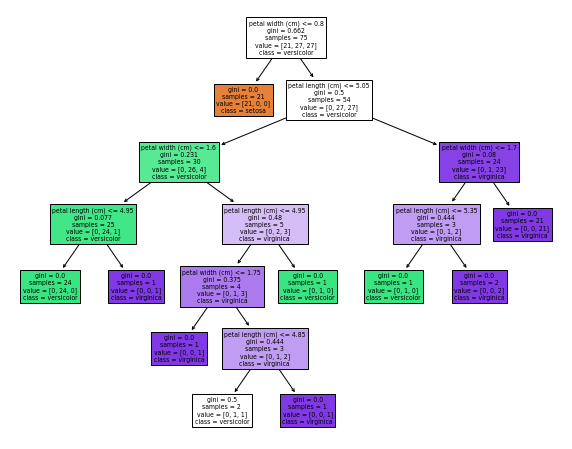

In [5]:
plt.figure(figsize = (10, 8))

plot_tree(tree_clf,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names,
          filled=True);

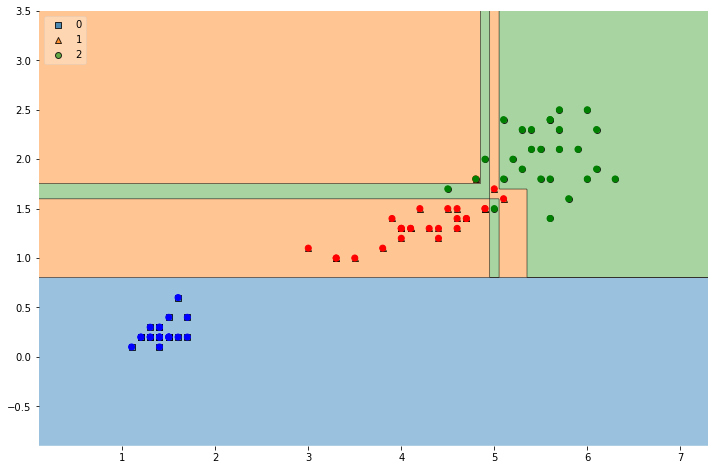

In [ ]:
decision_regions(X_train, y_train, tree_clf)

## Pruning (przycinanie drzewa)

In [6]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf2.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(tree_clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf2.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 1.00


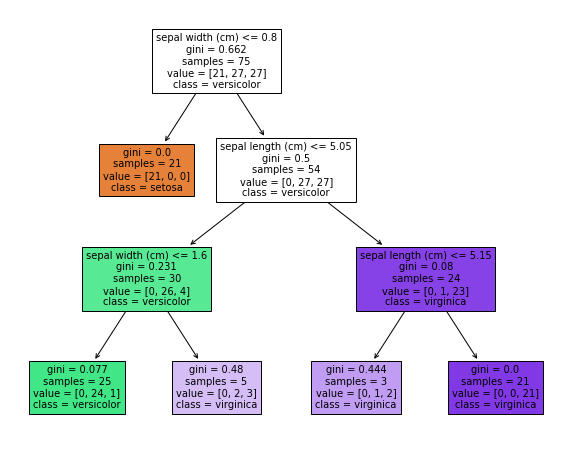

In [7]:
plt.figure(figsize = (10, 8))

plot_tree(tree_clf2,
          feature_names = iris.feature_names,
          class_names = iris.target_names,
          filled=True);

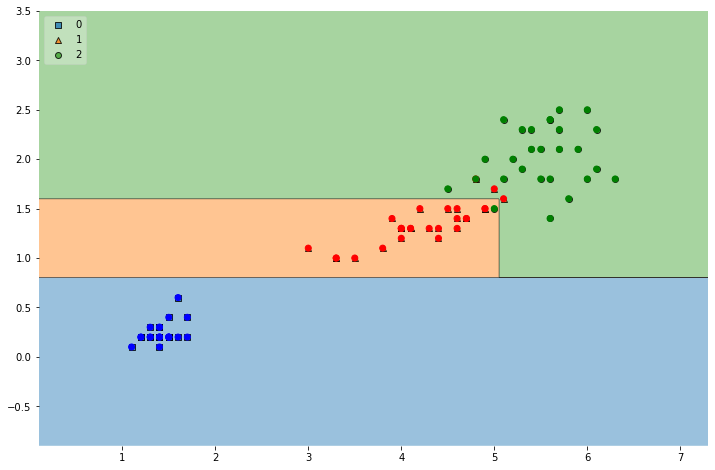

In [ ]:
decision_regions(X_train, y_train, tree_clf2)

In [14]:
y_pred = tree_clf2.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



# Zadania do przećwiczenia

Wczytaj zbiór `load_breast_cancer` dostępny w `sklearn.datasets`- UWAGA! w tym przypadku nie da się juz zwizualizować za pomocą `decision_regions`  
Podziel zbiór na treningowy i testowy w proporcjach 7:3.  
Wytrenuj model DecisionTreeClassifier bez przycinania.  
Sprawdź accuracy na zbiorze treningowym i testowym.  
Narysuj drzewo.  
Manipuluj parametrami (max_depth, min_samples_split, min_weight_fraction_leaf, max_leaf_nodes, max_features) by sprawdzić jak zachowują się wyniki.   



Narysuj wykres zależności wielkości wybranego parametru od wyników accuracy.  
Sprawdz istotność zmiennych dla najlepszego modelu.

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [21]:
len(cancer.feature_names)

30

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
import pandas as pd
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [24]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
tree_clf4 = DecisionTreeClassifier(random_state=0)
tree_clf4.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

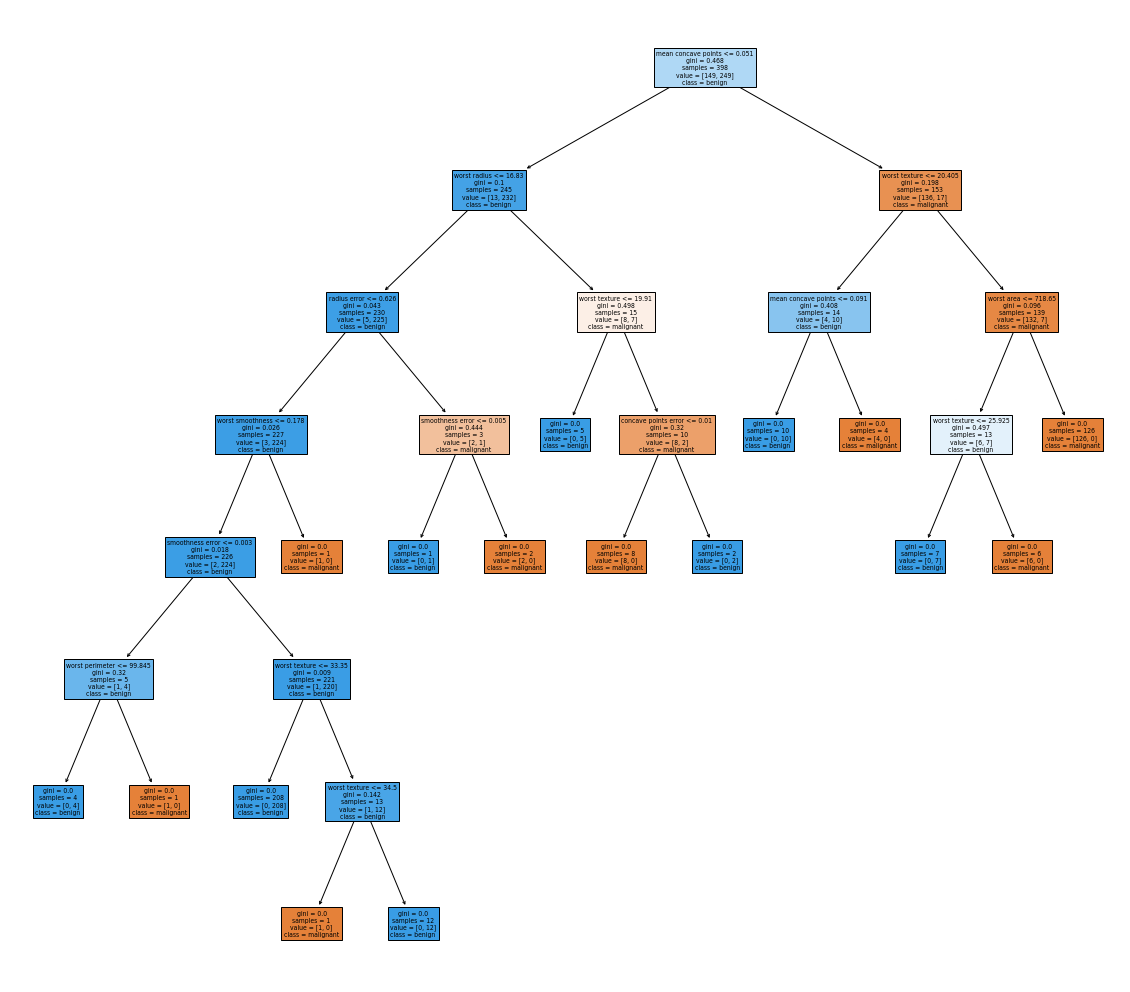

In [26]:
plt.figure(figsize = (20, 18))

plot_tree(tree_clf4,
          feature_names = cancer.feature_names,
          class_names = cancer.target_names,
          filled=True);

In [27]:
print("Accuracy on training set: {:.2f}".format(tree_clf4.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf4.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.92


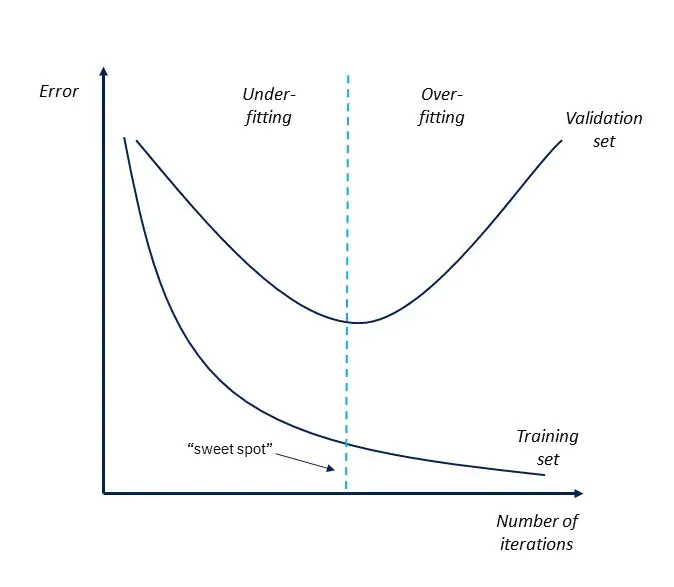

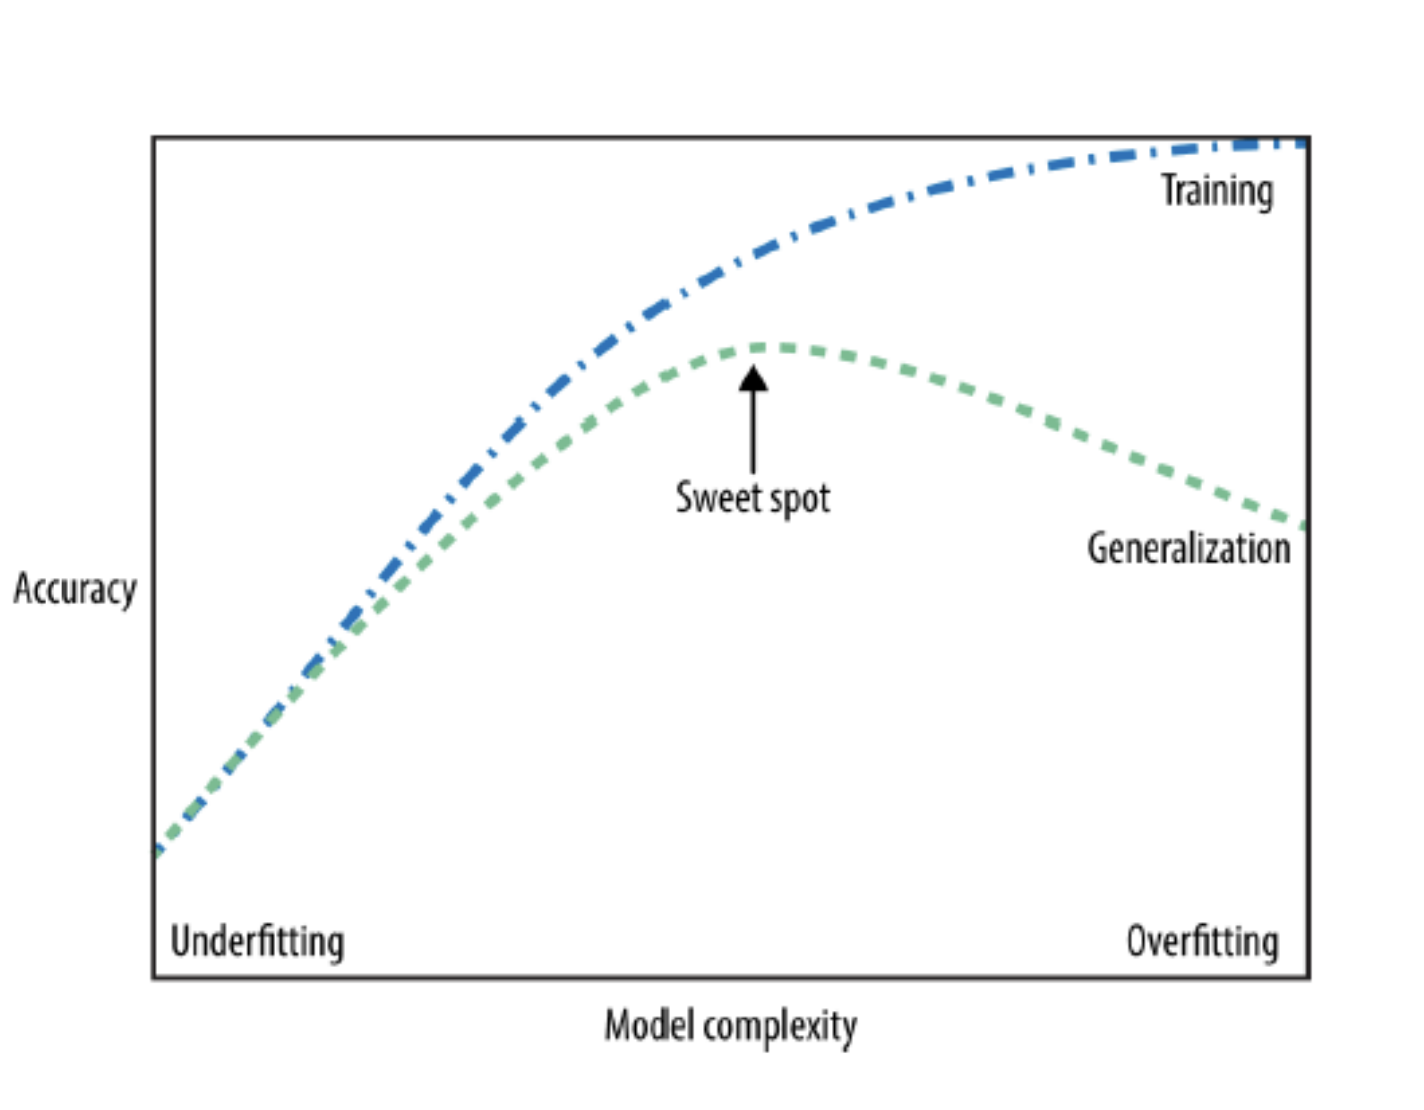

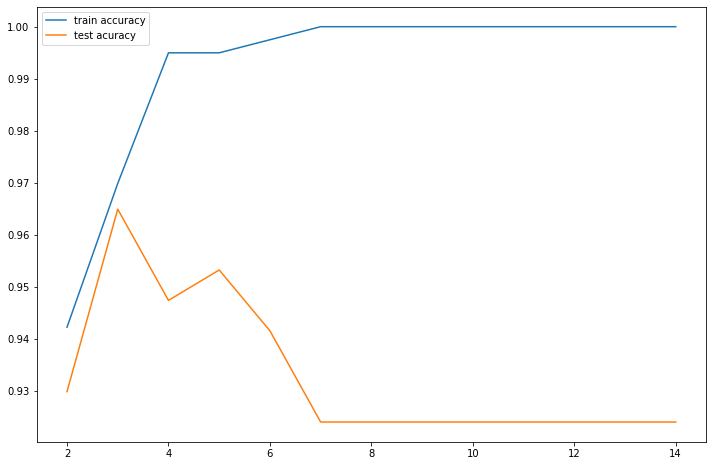

In [31]:
from sklearn.metrics import mean_squared_error, accuracy_score


# zakres parametru
max_depths = list(range(2, 15))
# pusta lista do której będziemy "wkładać" accuracy dla zbioru treningowego
train_acc = []
# pusta lista dla zbioru testowego
test_acc = []

## w  każdym kroku pętli będziemy trenowali model dla danego parametru max_depths
# następnie sprawdzimy skuteczność na zbiorze testowym i treningowym
# tymi wartościami uzupełniać będziemy listy

for param in max_depths:
    model = DecisionTreeClassifier(max_depth=param, random_state=0).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))
    
## wyświetlamy wykres gdzie na osi x mamy parametry max_depths a na osi x accuracy
## osobnymi kolorami wyświetlimy wyniki na zbiorze treningowym i testowym
plt.figure(figsize = (12, 8))
plt.plot(max_depths, train_acc, label = 'train accuracy')
plt.plot(max_depths, test_acc, label = 'test acuracy')
plt.legend()
plt.show()   

max_features: The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider all features available to make the best split.

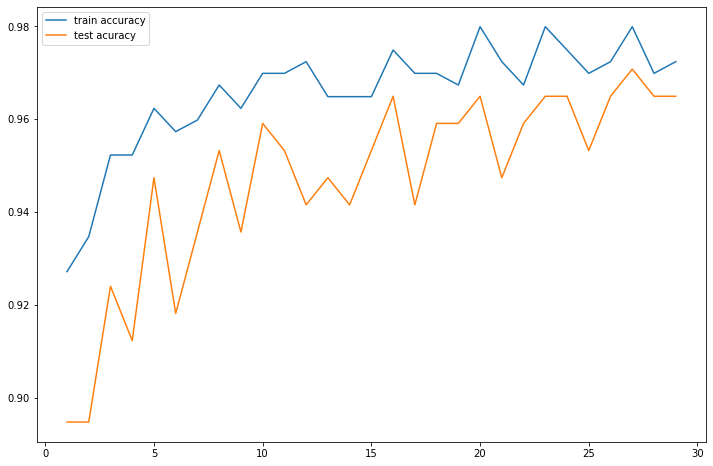

In [32]:
# zakres parametru
max_features = list(range(1, 30))
train_acc = []
test_acc = []

for param in max_features:
    model = DecisionTreeClassifier(max_features=param, max_depth=3, random_state=0).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))
    
plt.figure(figsize = (12, 8))
plt.plot(max_features, train_acc, label = 'train accuracy')
plt.plot(max_features, test_acc, label = 'test acuracy')
plt.legend()
plt.show()

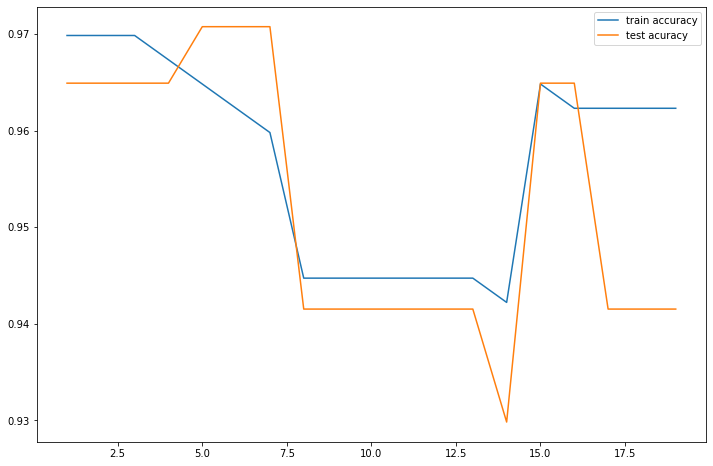

In [35]:
# zakres parametru
params = list(range(1, 20))
train_acc = []
test_acc = []

for param in params:
    model = DecisionTreeClassifier(min_samples_leaf=param, max_depth=3, random_state=0).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))
    
plt.figure(figsize = (12, 8))
plt.plot(params, train_acc, label = 'train accuracy')
plt.plot(params, test_acc, label = 'test acuracy')
plt.legend()
plt.show()   

In [36]:
tree_clf3 = DecisionTreeClassifier(min_samples_leaf=7, random_state=0)
tree_clf3.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(tree_clf3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf3.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.96


In [37]:
tree_clf3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf3.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(tree_clf3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf3.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.96


In [38]:
tree_clf3 = DecisionTreeClassifier(max_features=25, random_state=0)
tree_clf3.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(tree_clf3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf3.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.94


In [39]:
tree_clf3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, max_features=25, random_state=0)
tree_clf3.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(tree_clf3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf3.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.96


In [40]:
tree_clf3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 25,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [41]:
print("Feature importances:\n{}".format(tree_clf3.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.80090966 0.         0.         0.00612382 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.04486213 0.09260355 0.         0.04158954
 0.         0.         0.         0.01391129 0.         0.        ]


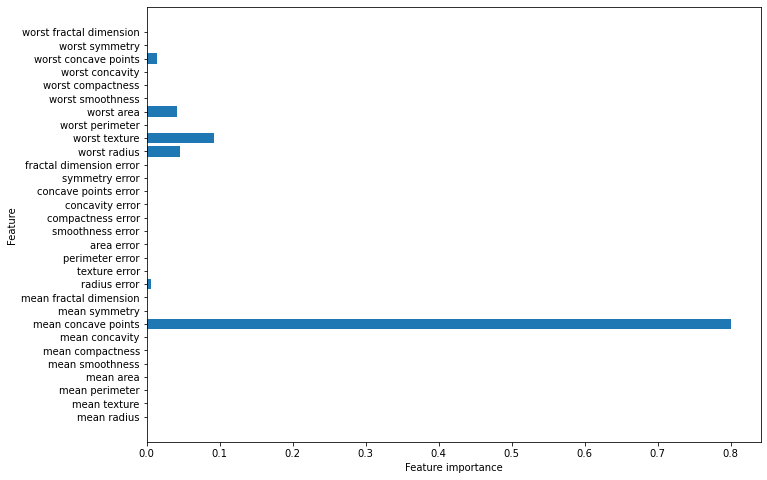

In [42]:
import numpy as np


def plot_feature_importances_cancer(model):
    plt.figure(figsize = (11, 8))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree_clf3)

In [43]:
## tworzymy dataframe z istotnością i nazwami kolumn - sortujemy malejąco wg importance
pd.DataFrame({'feature': cancer.feature_names,
              'importance': tree_clf3.feature_importances_}
            ).sort_values(by='importance',ascending=False)

,feature,importance
7,mean concave points,0.800910
21,worst texture,0.092604
20,worst radius,0.044862
23,worst area,0.041590
27,worst concave points,0.013911
10,radius error,0.006124
0,mean radius,0.000000
16,concavity error,0.000000
28,worst symmetry,0.000000
26,worst concavity,0.000000


### Wniosek:

Klasa DecisionTreeClassifier posiada kilka parametrów, które ograniczają kształt drzewa decyzyjnego i zapobiegają przeuczeniu, np.:
* max_depth (maksymalna głębokość)
* min_samples_split (minimalna liczba próbek jaką węzeł musi mieć, zanim będzie żeby mógł zostać podzielony),
* min_weight_fraction_leaf (to samo co min_samples_leaf, ale wyrażone jako ułamek całkowitej liczby ważonych instancji),
* max_leaf_nodes (maksymalna liczba liści)
* max_features (maksymalna liczba cech, które są oceniane przy podziale w każdym węźle). 